# 0. References
1. [Deep Drowsiness Detection using YOLO, Pytorch and Python](https://www.youtube.com/watch?v=tFNJGim3FXw)    
2. [YOLO-Drowsiness-Detection](https://github.com/nicknochnack/YOLO-Drowsiness-Detection)  
3. [Tutorial: Running YOLOv5 Machine Learning Detection on a Raspberry Pi 4](https://jordan-johnston271.medium.com/tutorial-running-yolov5-machine-learning-detection-on-a-raspberry-pi-4-3938add0f719)  

## 0.1 Mount Google Drive

In [1]:
import os

try:
    from google.colab import drive
    IN_COLAB = True
    drive.mount('/content/drive')
    root_path = '/content/drive/MyDrive/git/dog-poop-detector-yolov5'
    os.chdir(root_path)

except ImportError:
    IN_COLAB = False
    root_path = os.getcwd()

if IN_COLAB:
    print("Running in Google Colab")
else:
    print("Not running in Google Colab")
    
print(os.getcwd())

Mounted at /content/drive
Running in Google Colab
/content/drive/MyDrive/git/dog-poop-detector-yolov5


# 1. Install dependencies

In [2]:
!pip install yolov5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.3/953.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.1/593.1 kB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/6

# 2. Check GPU availability

In [ ]:
import torch

if torch.cuda.is_available():
    print("GPU is available!")
    !nvidia-smi
else:
    print("GPU is not available.")

GPU is available!
Wed May 31 08:43:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                      

# 3. Load Model (yolov5s)

In [3]:
import os
import yolov5
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
model = yolov5.load('yolov5s.pt')
model.conf = 0.7

## 3.1 Test is YOLO detection working

In [ ]:
sources = [
    'https://s.yimg.com/ny/api/res/1.2/.Yfa9cvEYDMFw6FodZch8g--/YXBwaWQ9aGlnaGxhbmRlcjt3PTk2MDtoPTU0MTtjZj13ZWJw/https://media.zenfs.com/en/dog_time_927/d56c8a78d352ed6a1ea2d506e200e130',
    'https://www.halifaxhumanesociety.org/zupload/library/153/-703-700x500-0.jpg',
    'dataset/tests/test1.jpg',
    'dataset/tests/test2.png'
]

In [27]:
def detect(source):
  results = model(source)
  results.print()

  # display detection result
  %matplotlib inline
  plt.figure(figsize=(10, 10))
  plt.imshow(np.squeeze(results.render()))
  plt.show()

In [ ]:
for source in sources:
  detect(source)

Output hidden; open in https://colab.research.google.com to view.

# 4. Capture & label image samples for model training

## 4.1 Capture image samples
Prepare image samples, images preferable to be in square dimensions (e.g: 640x640 pixels)

## 4.2 Label you image samples
https://youtu.be/tFNJGim3FXw?t=2810

### Install LabelImg

In [4]:
!pip install labelImg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 98.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 11.3 MB/s eta 0:00:00
  Created wheel for labelImg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261522 sha256=6771af6663f44753ac3a85b300c44df5a69b34cbbc09882b182be2b62f28fdc7
  Stored in directory: /root/.cache/pip/wheels/d9/f0/1e/74c509495458cad13a0fda23fe605e643177625cf2b5c17b34
Successfully built labelImg


### Start label images
https://youtu.be/tFNJGim3FXw?t=3142

In [5]:
!labelImg

QObject::moveToThread: Current thread (0x1657d80) is not the object's thread (0x191d200).
Cannot move to target thread (0x1657d80)

qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb, eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, wayland-egl, wayland, wayland-xcomposite-egl, wayland-xcomposite-glx, webgl.



# 5. Train Model
Refer： https://youtu.be/tFNJGim3FXw?t=3536

## 5.1 Start training

In [108]:
# setup dataset.yaml, https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data#11-create-datasetyaml

# delete label cache
label_cache_path = 'dataset/labels.cache'
if os.path.isfile(label_cache_path):
    os.remove(label_cache_path)

In [109]:
def elapsed_time(elapsed_sec):
  hours = int(elapsed_sec // 3600)
  minutes = int((elapsed_sec % 3600) // 60)
  seconds = int(elapsed_sec % 60)

  # Display the execution time
  print(f"Execution time: {hours}hr {minutes}min {seconds}sec")

In [110]:
epochs = 1000
batch = 16
workers = 8
img_size = 640

In [111]:
import time

# measure execution time
start_time = time.time()

In [112]:
from yolov5 import train

train.run(imgsz=640, batch=batch, epochs=epochs, data='dataset.yaml', weights='yolov5s.pt', patience=0, workers=workers)

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=../../../../../usr/local/lib/python3.10/dist-packages/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=1000, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=0, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, bbox_interval=-1, artifact_alias=latest, neptune_token=None, neptune_project=None, s3_upload_dir=None, upload_dataset=False, hf_model_id=None, hf_token=None, hf_private=False, hf_dataset_id=None, roboflow_token=None, roboflow_upload=False, batch=16
YOLOv5 🚀 2023-6-1 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epo

requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.


Streaming output truncated to the last 5000 lines.
                   all         76        170    0.00177      0.313    0.00159   0.000382

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      3/999      4.44G     0.1037    0.03174    0.02176         35        640: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]
                   all         76        170    0.00269      0.493     0.0071    0.00209

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      4/999      4.44G    0.09841    0.03172    0.01914         34        640: 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]
                   all         76        170     0.0026        0.5      0.062     0.0201

 

Namespace(weights='yolov5s.pt', cfg='', data='dataset.yaml', hyp={'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}, epochs=1000, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket='', cache=None, image_weights=False, device='', multi_scale=False, single_cls=False, optimizer='SGD', sync_bn=False, workers=2, project='runs/train', name='exp', exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=0, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, bbox_interval=-1, artifact_a

In [113]:
elapsed_time(time.time() - start_time)

Execution time: 1hr 48min 11sec


## 5.2 Show Training Results

In [114]:
def find_latest_exp(path):
  exp_folders = [folder for folder in os.listdir(path) if folder.startswith('exp')]

  if exp_folders:
      latest_exp = max(exp_folders, key=lambda x: 0 if x=='exp' else int(x[3:]))
      print("Latest experiment number:", latest_exp)
  else:
      print("No 'exp' folders found.")
      latest_exp = 'exp'

  return latest_exp

In [115]:
train_path = 'runs/train'
latest_exp = find_latest_exp(train_path)

Latest experiment number: exp5


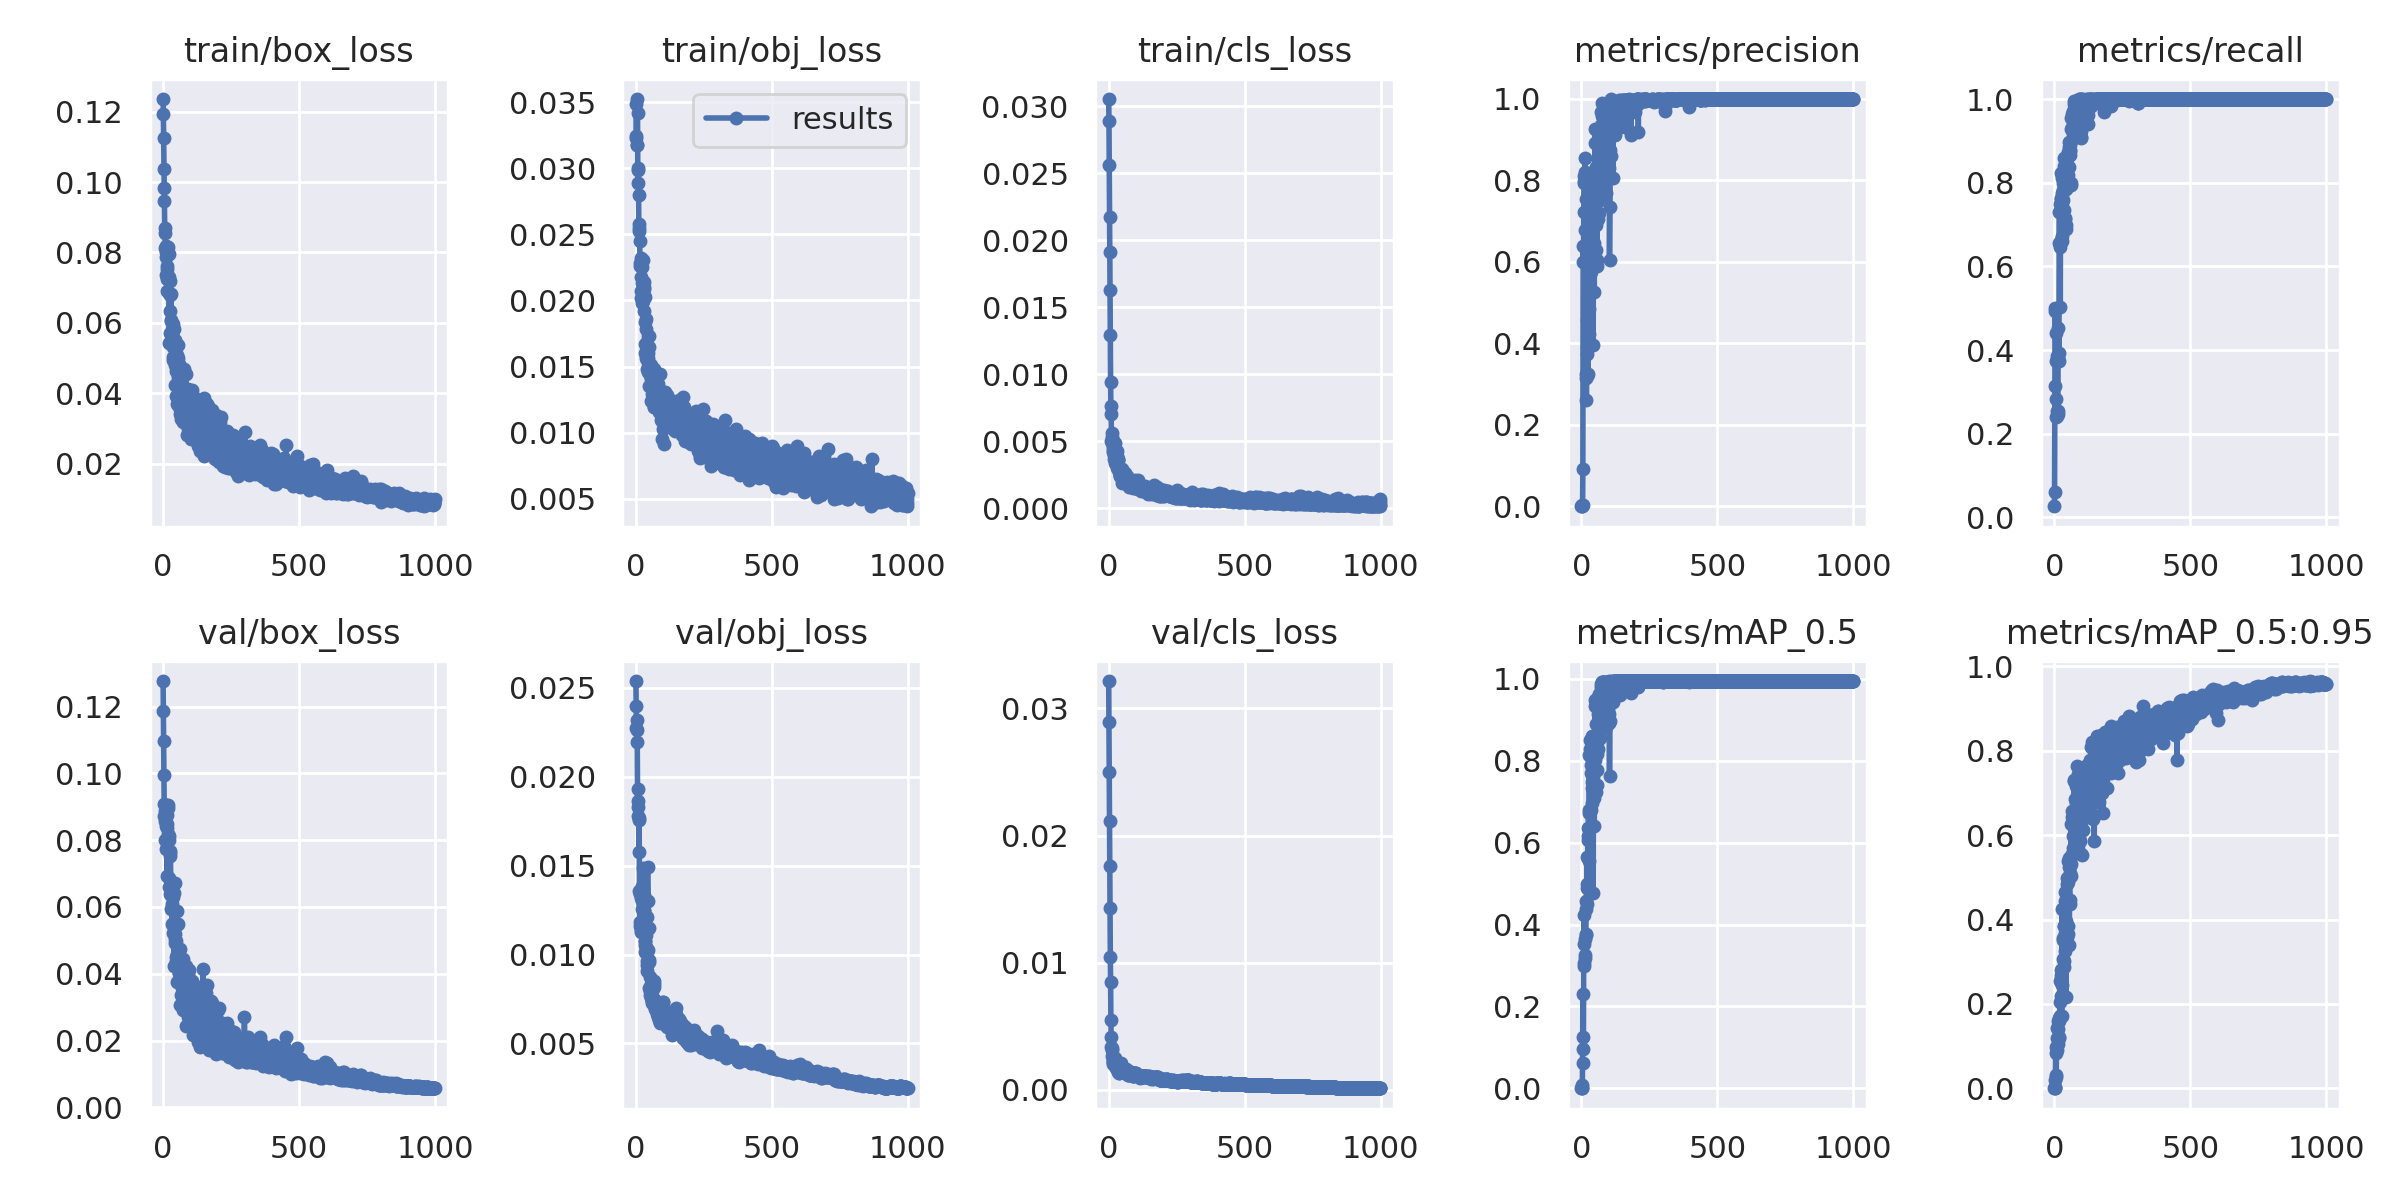

In [116]:
from PIL import Image

# Load the image
image_path = f'{train_path}/{latest_exp}/results.png'
image = Image.open(image_path)

# Display the image
image.show()

# 6. Evaluate Model

In [135]:
model_path = f'{train_path}/{latest_exp}/weights/last.pt'
print(model_path)

runs/train/exp5/weights/last.pt


In [136]:
model = yolov5.load(model_path)
model.conf = 0.7

print(model.names)

{0: 'dog', 1: 'poop'}


## 6.1 Evaluate on images

In [119]:
evals = [
    {"source": "dataset/tests/test1.png", "results": {"dog": 1, "poop": 2}},
    {"source": "dataset/tests/test2.png", "results": {"dog": 1, "poop": 2}},
    {"source": "dataset/tests/test3.png", "results": {"dog": 1, "poop": 3}},
    {"source": "dataset/tests/test4.png", "results": {"dog": 1, "poop": 5}},
    {"source": "dataset/tests/test5.png", "results": {"dog": 1, "poop": 5}},
]

In [133]:
from collections import Counter

def evaluate(source, expected_results):
    results = model(source)

    # Get the class labels
    class_labels = model.names

    # Initialize dictionaries to store class counts and total confidence
    class_counts = Counter()
    class_total_confidence = Counter()

    # Iterate over the detected objects
    for obj in results.pred[0]:
        class_id = int(obj[5])
        class_label = class_labels[class_id]
        confidence = obj[4]
        
        # Update class counts and total confidence
        class_counts[class_label] += 1
        class_total_confidence[class_label] += confidence

    for class_label, expected_count in expected_results.items():
        detected_count = class_counts[class_label]
        total_confidence = class_total_confidence[class_label]
        
        # Calculate mean confidence
        mean_confidence = total_confidence / detected_count if detected_count > 0 else 0.0
        mean_confidence = round(mean_confidence.item(), 3)
        
        passed = detected_count == expected_count
        print(f"{'✅' if passed else '❌'} Class: {class_label}, Count: {detected_count}, Expected: {expected_count}, Mean Confidence: {mean_confidence}")

    results.print()

    # display detection result
    %matplotlib inline
    plt.figure(figsize=(10, 10))
    plt.imshow(np.squeeze(results.render()))
    plt.show()

image 1/1: 1296x2304 1 dog, 2 poops
Speed: 92.3ms pre-process, 8.1ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


Evaluating model with 'dataset/tests/test1.png'
✅ Class: dog, Count: 1, Expected: 1, Mean Confidence: 0.975
✅ Class: poop, Count: 2, Expected: 2, Mean Confidence: 0.82


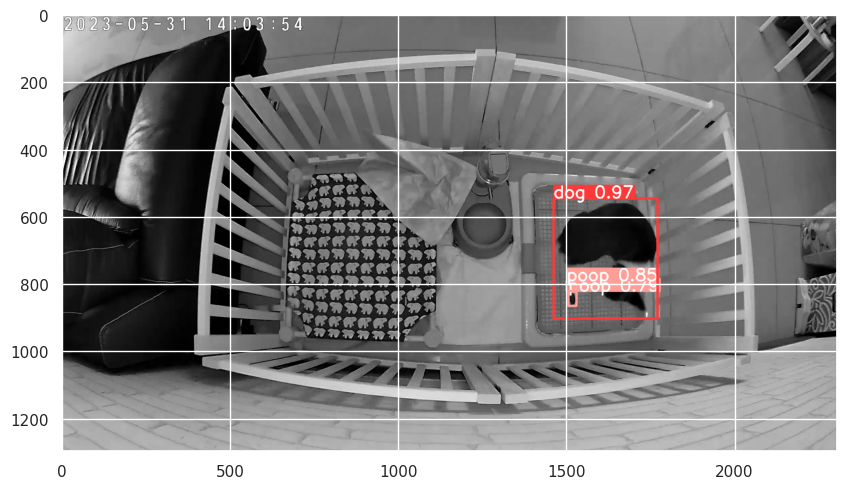

image 1/1: 1296x2304 1 dog, 2 poops
Speed: 103.3ms pre-process, 10.6ms inference, 2.3ms NMS per image at shape (1, 3, 384, 640)


Evaluating model with 'dataset/tests/test2.png'
✅ Class: dog, Count: 1, Expected: 1, Mean Confidence: 0.975
✅ Class: poop, Count: 2, Expected: 2, Mean Confidence: 0.871


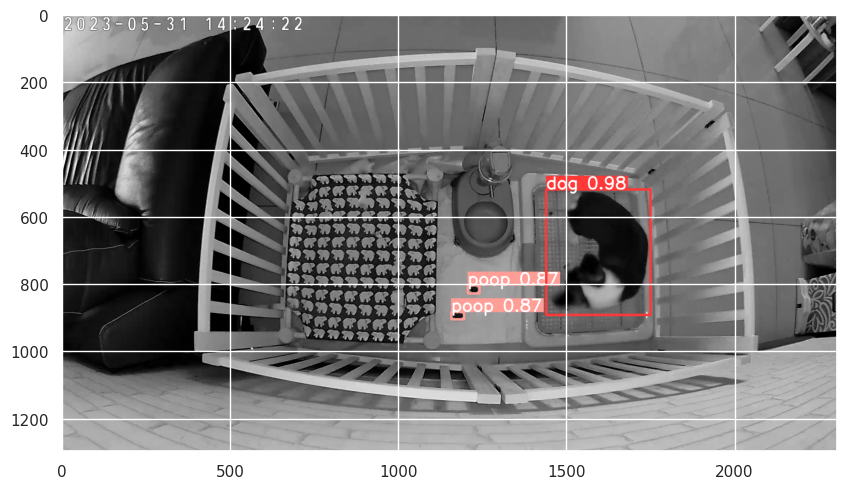

image 1/1: 1296x2304 1 dog, 3 poops
Speed: 108.5ms pre-process, 8.0ms inference, 1.8ms NMS per image at shape (1, 3, 384, 640)


Evaluating model with 'dataset/tests/test3.png'
✅ Class: dog, Count: 1, Expected: 1, Mean Confidence: 0.982
✅ Class: poop, Count: 3, Expected: 3, Mean Confidence: 0.902


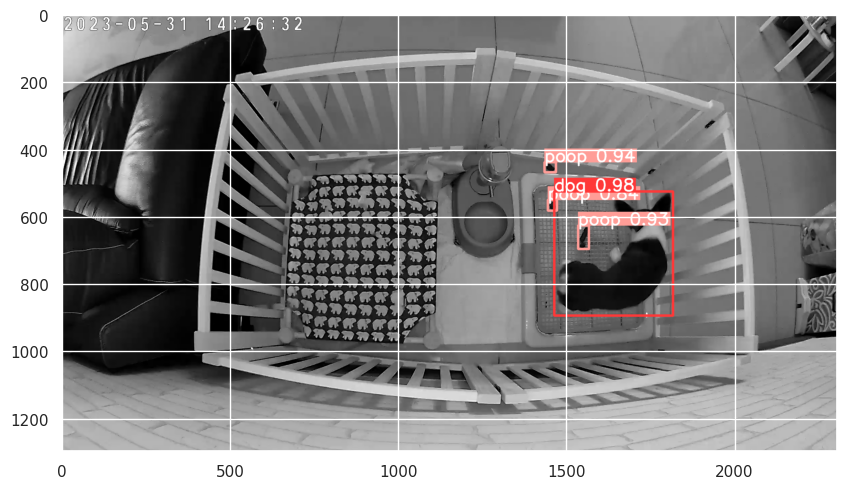

image 1/1: 1296x2304 1 dog, 5 poops
Speed: 115.3ms pre-process, 8.0ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


Evaluating model with 'dataset/tests/test4.png'
✅ Class: dog, Count: 1, Expected: 1, Mean Confidence: 0.973
✅ Class: poop, Count: 5, Expected: 5, Mean Confidence: 0.921


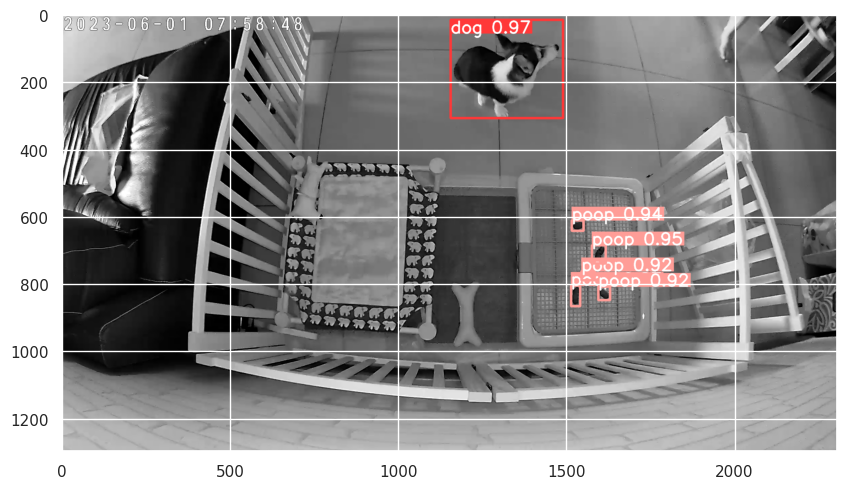

image 1/1: 1296x2304 1 dog, 5 poops
Speed: 113.3ms pre-process, 8.0ms inference, 2.3ms NMS per image at shape (1, 3, 384, 640)


Evaluating model with 'dataset/tests/test5.png'
✅ Class: dog, Count: 1, Expected: 1, Mean Confidence: 0.974
✅ Class: poop, Count: 5, Expected: 5, Mean Confidence: 0.932


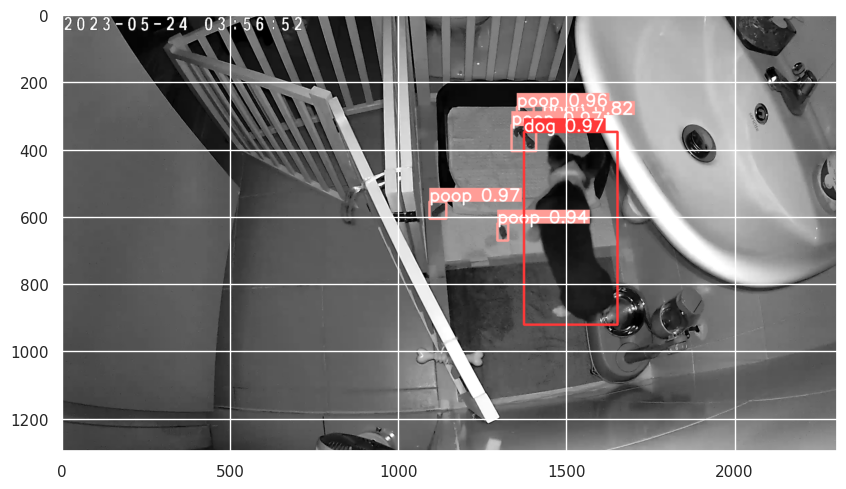

In [137]:
for eval in evals:
  source = eval['source']
  expected_results = eval['results']
  print(f"Evaluating model with '{source}'")
  evaluate(source, expected_results)

## 6.2 Test on video

In [138]:
source = 'dataset/tests'

In [139]:
from yolov5 import detect

nosave = False
view_img = False
detect.run(weights=model_path, source=source, line_thickness=2, conf_thres=0.7, view_img=view_img, nosave=nosave)

YOLOv5 🚀 2023-6-1 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
video 1/4 (1/266) /content/drive/MyDrive/git/dog-poop-detector-yolov5/dataset/to-eval/1685513387290.mp4: 384x640 1 dog, 8.0ms
video 1/4 (2/266) /content/drive/MyDrive/git/dog-poop-detector-yolov5/dataset/to-eval/1685513387290.mp4: 384x640 1 dog, 8.0ms
video 1/4 (3/266) /content/drive/MyDrive/git/dog-poop-detector-yolov5/dataset/to-eval/1685513387290.mp4: 384x640 1 dog, 8.0ms
video 1/4 (4/266) /content/drive/MyDrive/git/dog-poop-detector-yolov5/dataset/to-eval/1685513387290.mp4: 384x640 1 dog, 8.0ms
video 1/4 (5/266) /content/drive/MyDrive/git/dog-poop-detector-yolov5/dataset/to-eval/1685513387290.mp4: 384x640 1 dog, 7.9ms
video 1/4 (6/266) /content/drive/MyDrive/git/dog-poop-detector-yolov5/dataset/to-eval/1685513387290.mp4: 384x640 1 dog, 8.0ms
video 1/4 (7/266) /content/drive/MyDrive/git/dog-poop-detector-yolov5/data